<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Week_8_data_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 8 Assignment Data 602

*Nikita Dharmadhikari*

## Unsupervised Models
Use the wine data to conduct Principal Component Analysis. The URL is
https://archive.ics.uci.edu/ml/'machine-learning-databases/wine/wine.data

- Load the dataset. What are the features?
- Create a DataFrame of given wine dataset. Standardize the features.
- Split the dataset into training and test sets (30%).
- Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine
covariance matrix. Print the eigenvalues.
- Compute and plot the individual explained variance and the cumulative explained
variance (range from 1 to 14). Using the NumPy cumsum function, calculate the
cumulative sum of explained variances, which you will then plot via Matplotlib's step
function. Explain the outcomes.
- Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue,
eigenvector) tuples. Sort the (eigenvalue, eigenvector) tuples from high to low. Print the
projection matrix W.
- Using the projection matrix, transform a sample x onto the PCA subspace (the
principal components 1 and 2). Transform the entire 124 x 13-dimensional training
dataset onto the two principal components by calculating the matrix dot product.
- Visualize the transformed Wine training set into a two-dimensional scatterplot.
- Method number 2. Import ListedColormap. Set up marker generator and color map. ---
- Plot the decision surface and plot the class samples.
- Import LogisticRegression and PCA. Visualize the decision regions (hint: X_train_pca,
y_train, classifier=lr).

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 

import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None) # Load wine dataset
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # Separate classification attributes from general attributes
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 70% of the whole data set is divided into training set and 30% is test set

In [7]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Eigenvalues [4.8923 2.4664 1.4281 1.0123 0.8491 0.6018 0.5225 0.0841 0.3305 0.296
 0.1683 0.2143 0.24  ]


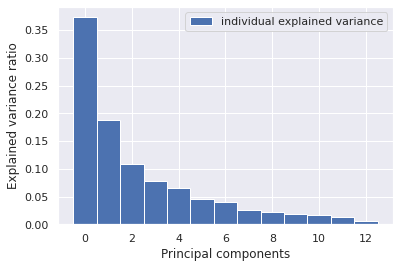

In [9]:
#Calculate covariance matrix
cov_mat = np.cov(X_train_std.T)

#Finding eigenvalues and eigenvectors of covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# Print the eigenvalues.
print('Eigenvalues %s' % eigen_vals)# The output below is eigen_vals

"""The significance of the calculated eigenvalue is the size of the eigenvector.
 Therefore, as long as we find the eigenvector corresponding to the maximum eigenvalue, 
 we can know which direction has the largest variance."""
#[4.8923 2.4664 1.4281 1.0123 0.8491 0.6018 0.5225 0.0841 0.3305 0.296
#0.1683 0.2143 0.24  ]



tot = sum(eigen_vals) # Find the sum of eigenvalues
"""That is, how much variance does each principal component capture,Describe the contribution value of the sample"""
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # Calculate the proportion of each eigenvalue (in descending order)

plt.bar(range(len(eigen_vals)), var_exp, width=1.0, bottom=0.0, alpha=1, label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


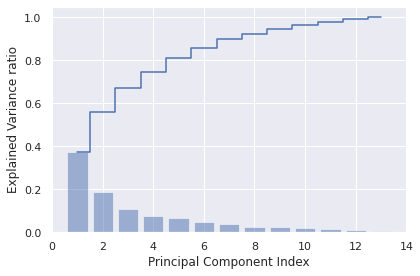

In [11]:
# Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14).
total = sum(eigen_vals)
explained_var = [(i / total) for i in sorted(eigen_vals, reverse=True)]

# Using the NumPy cumsum function, calculate the cumulative sum of explained variances
explained_var_cum = np.cumsum(explained_var)


# plot via Matplotlib's step function
plt.bar(range(1, 14), explained_var, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, 14), explained_var_cum, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Component Index')
plt.tight_layout()
plt.show()

Projection Matrix W:
 [[ 0.1467  0.5042 -0.1172]
 [-0.2422  0.2422  0.1499]
 [-0.0299  0.287   0.6564]
 [-0.2552 -0.0647  0.5843]
 [ 0.1208  0.23    0.0823]
 [ 0.3893  0.0936  0.1808]
 [ 0.4233  0.0109  0.143 ]
 [-0.3063  0.0187  0.1722]
 [ 0.3057  0.0304  0.1584]
 [-0.0987  0.5453 -0.1424]
 [ 0.3003 -0.2792  0.0932]
 [ 0.3682 -0.1744  0.1961]
 [ 0.2926  0.3632 -0.0973]]
----------


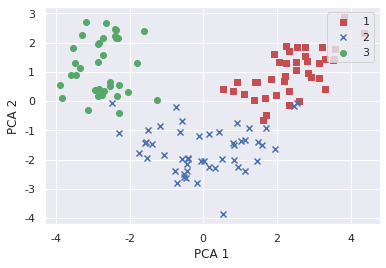

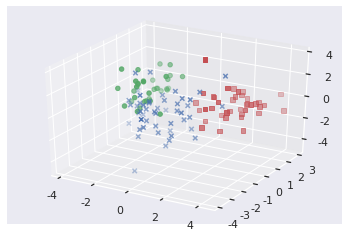

In [14]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))] # The eigenvalues are paired with the corresponding eigenvectors
eigen_pairs.sort(reverse=True) # Sorting with eigenvalues

"""The first two pairs are selected to construct the mapping matrix, but in practical application, we should weigh the computational efficiency and the performance between classifiers to select the appropriate principal component score"""
first = eigen_pairs[0][1]
second = eigen_pairs[1][1]
third = eigen_pairs[2][1]
first = first[:,np.newaxis]
second = second[:,np.newaxis]
third = third[:,np.newaxis]

w = np.hstack((first,second,third))

print('Projection Matrix W:\n', w)

print('----------')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
X_train_pca = X_train_std.dot(w) # Transform training set
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) # Scatter diagram
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper right')
# plt.show()


"""3d Show principal components"""
fig =plt.figure()
ax = fig.add_subplot(111,projection='3d')
for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],X_train_pca[y_train==l, 2], c=c, label=l, marker=m)
plt.show()